# Filtros de procesamiento de imagenes

## Filtro de umbral

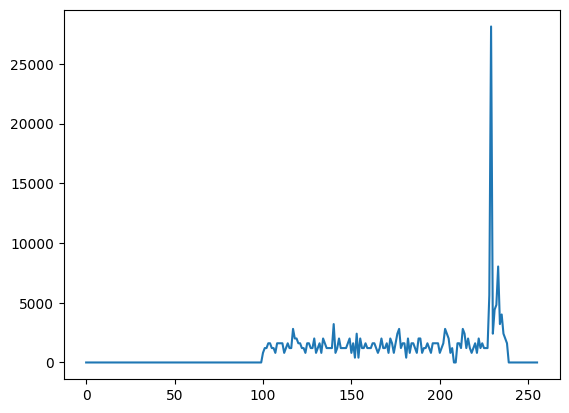

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/cielo.jpeg")
cv2.imshow("Imagen original", img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()


valor_umbral, img_umbral = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Imagen filtrada", img_umbral)
plt.plot(valor_umbral)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### Filtro de umbral simple

Esta tecnica de segmentacion se utiliza para separar un objeto del fondo. Veamos el histograma correspondiente a la imagen de la cupula del Panteon que ya trabajamos la clase pasada.

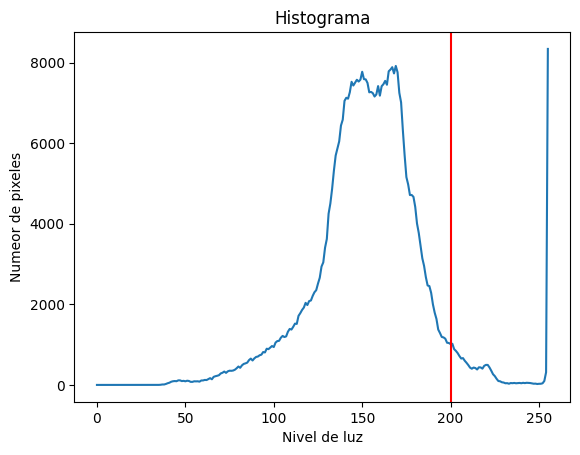

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/domo.jpeg',0)

hist = cv2.calcHist([img],[0],None,[256],[0,256])

cv2.imshow('Imagen',img)

plt.xlabel('Nivel de luz')
plt.ylabel('Numeor de pixeles')
plt.title('Histograma')
plt.plot(hist)
plt.axvline(x=200, color='red')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

Vamos a umbralizar esta imagen de manera que los pixeles que esten situados a la izquierda de la linea roja aparezcan en negro en la imagen filtrada (esto es con el valor 0) y los pixeles que estan a la derecha se mostraran con el valor maximo (255). La funcion que nos permite realizar este tipo de filtrado en OpenCV es:

**threshold(imagen, valor, umbral, valor maximo, tipo umbral)**

Esta funcion devuelve dos resultados, el valor del umbral utilizado y la imagen filtrada.

### Filtro de umbral adaptativo

La funcion en OpenCV que se utiliza para aplicar este tipo de filtro es:

**adaptiveThreshold (imagen, valor maximo, metodo, tipo umbral, area vecindad, constante)**

Veamos un ejemplo para este filtro. Usaremos la siguiente imagen, que representa una lista de 100 numeros situados en casillas con dos tonos de fondo:

![Tabla numeros](img/tabla.jpeg)

Vamos a intentar eliminar el fondo, de manera que se vean unicamente los numeros. Para hacer esto utilizaremos el filtro umbral adaptativo gaussiano.


In [32]:
import cv2

area_vecindad = 3
constante = 15

img = cv2.imread("img/tabla.jpeg", 0)
img_umbral = cv2.adaptiveThreshold(
    img,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    area_vecindad,
    constante,
)

cv2.imshow('Imagen filtrada', img_umbral)
cv2.imshow('Imagen original', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtros lineales

### Filtro pasabajos (suavizado)

La forma en que OpenCV aplica este filtro consiste en hacer que cada pixel de la imagen filtrada tenga el valor promedio de los pixeles contenidos en el area que rodea al pixel correspondiente en la imagen original. La funcion que aplica es:

**blur(imagen, kernel)**


In [39]:
import cv2

area_vecindad = 3
constante = 0

img = cv2.imread("img/catedral.jpeg", 0)
img_suave = cv2.blur(img, (5,5))

cv2.imshow("Imagen suavizada", img_suave)
cv2.imshow("Imagen original", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Filtro pasaalto

Para resaltar las zonas con cambios bruscos de intensidad, vamos a aplicar un metodo mas sencillo que consiste en restar a la imagen original, la imagen suavizada.

**Imagen pasa alto = imagen oringal - imagen suavizada**

Veamos este ejemplo

In [41]:
import cv2

area_vecindad = 3
constante = 0

img = cv2.imread("img/catedral.jpeg", 0)
img_suave = cv2.blur(img, (5,5))
img_alto=cv2.subtract(img,img_suave)

cv2.imshow("Imagen suavizada", img_alto)
cv2.imshow("Imagen original", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

![Filtro bordes](img/subtract.jpg)

## Filtro Canny

El filtro canny es una herramienta que nos proporciona OpenCV para la deteccion de bordes, es decir, para la identificacion de los limites de los objetos de una imagen.

La funcion que utilizamos en OpenCV es:

**Canny(imagen, umbral inferior, umbral superior)**

In [45]:
import cv2

img = cv2.imread("img/catedral.jpeg", 0)
img_suave = cv2.blur(img, (5,5))
img_canny=cv2.Canny(img,100,200)

cv2.imshow("Imagen Canny", img_canny)
cv2.imshow("Imagen original", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

![Filtro Canny](img/canny.jpg)